In [ ]:
Digit Recognition using MNIST dataset

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

print("Keras version:", keras.__version__)

Keras version: 3.11.2


In [6]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [7]:
def build_and_train_model(activation, epochs=5):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=epochs,
                        batch_size=128,
                        verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return history, test_acc

In [8]:
activations = ['relu', 'sigmoid', 'tanh']
results = {}

for act in activations:
    print(f"Training with {act} activation...")
    history, acc = build_and_train_model(act, epochs=5)
    results[act] = {"history": history, "accuracy": acc}
    print(f"{act} Test Accuracy: {acc:.4f}")

Training with relu activation...
relu Test Accuracy: 0.9739
Training with sigmoid activation...
sigmoid Test Accuracy: 0.9616
Training with tanh activation...
tanh Test Accuracy: 0.9722


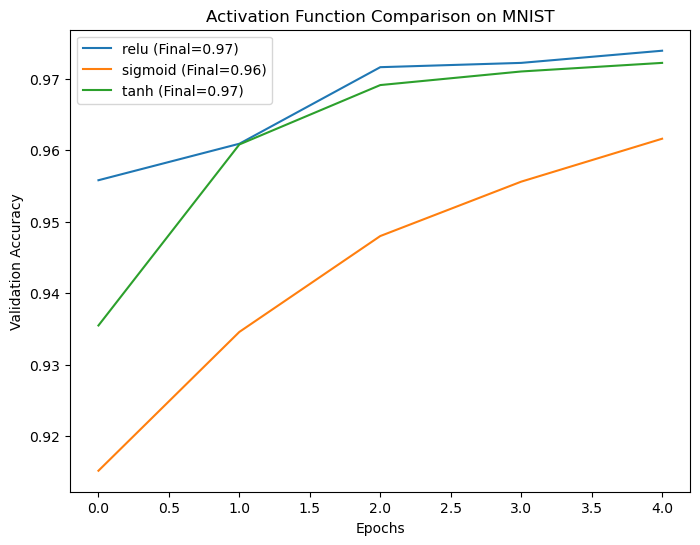

In [9]:
plt.figure(figsize=(8,6))
for act in activations:
    plt.plot(results[act]["history"].history['val_accuracy'],
             label=f"{act} (Final={results[act]['accuracy']:.2f})")

plt.title("Activation Function Comparison on MNIST")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [10]:
print("\nFinal Test Accuracies:")
for act in activations:
    print(f"{act}: {results[act]['accuracy']:.4f}")


Final Test Accuracies:
relu: 0.9739
sigmoid: 0.9616
tanh: 0.9722
